## lineplot

Draw a line plot with possibility of several semantic groupings.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import warnings;
warnings.filterwarnings('ignore')

In [2]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


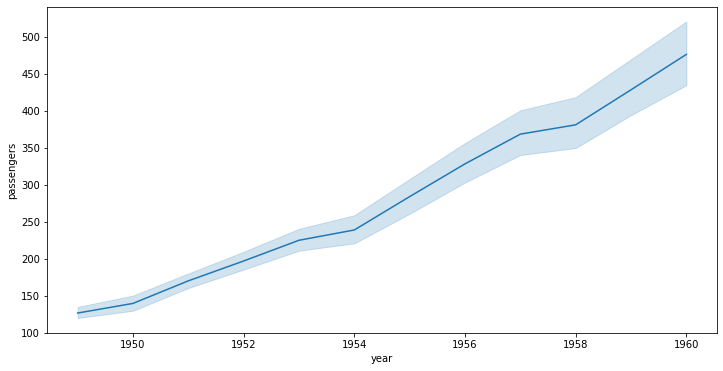

In [3]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='passengers',data=flights);

In [4]:
f_sum = flights.groupby(["year","month"]).sum()
f_sum

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

In [5]:
f_sum.reset_index().index

RangeIndex(start=0, stop=144, step=1)

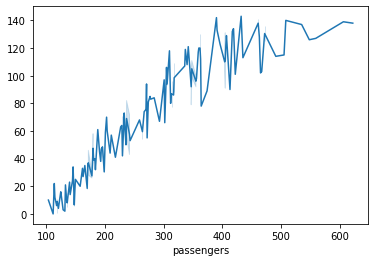

In [18]:
sns.lineplot(x=f_sum.passengers, y=f_sum.reset_index().index);

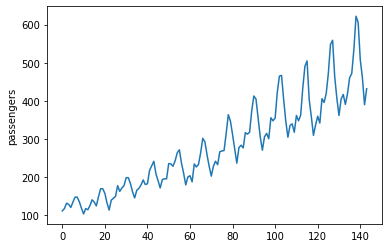

In [17]:
sns.lineplot(y=f_sum.passengers, x=f_sum.reset_index().index);

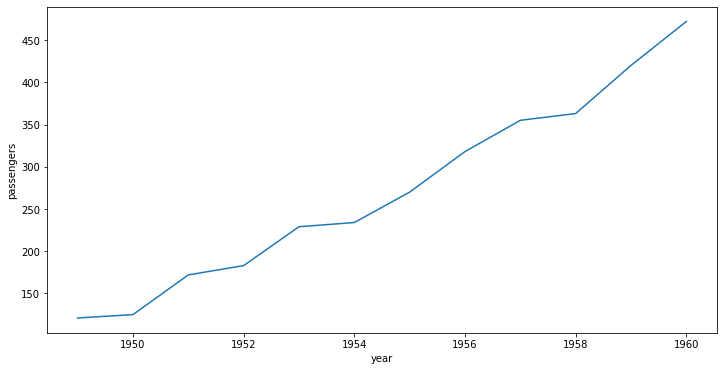

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='passengers', data=flights[flights.month=="May"]);

In [9]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


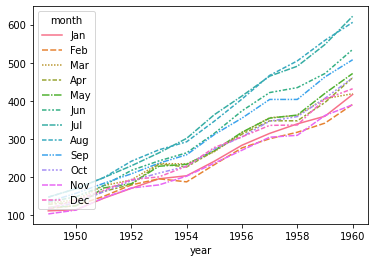

In [15]:
# plt.figure(figsize=(12,6))
sns.lineplot(data=flights_wide);

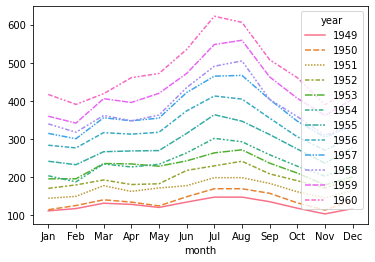

In [16]:
# plt.figure(figsize=(12,6))
sns.lineplot(data=flights_wide.T);

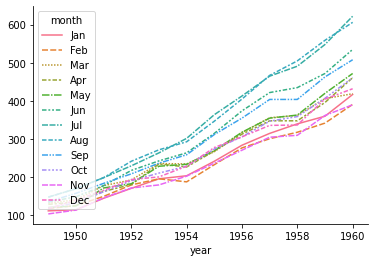

In [19]:
sns.lineplot(data=flights_wide)
sns.despine();

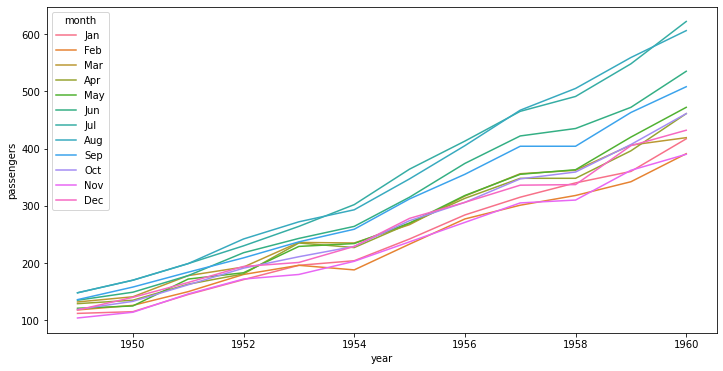

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x="year", y="passengers", hue="month");

## EXAMPLES

In [20]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


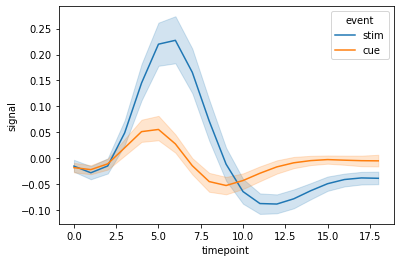

In [21]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event");

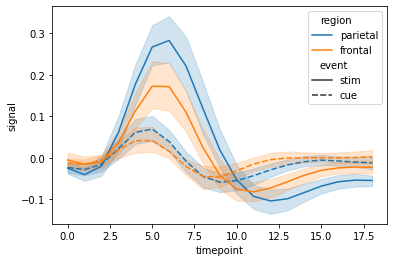

In [22]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event");

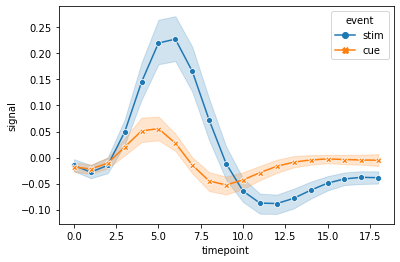

In [23]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="event", markers=True, dashes=False);

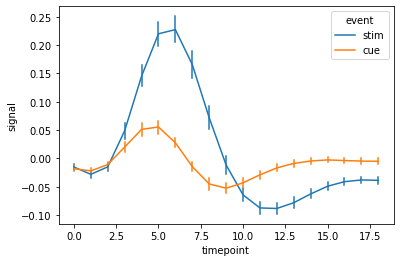

In [24]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", ci=68);

In [25]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


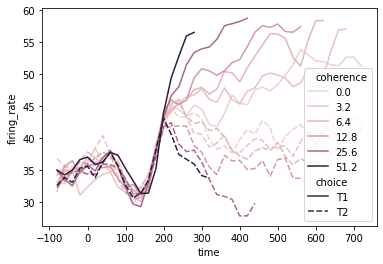

In [26]:
sns.lineplot(data=dots, x="time", y="firing_rate", hue="coherence", style="choice");

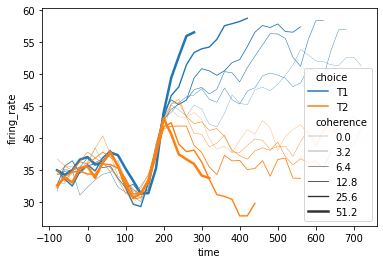

In [28]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.25, 2.5)
);

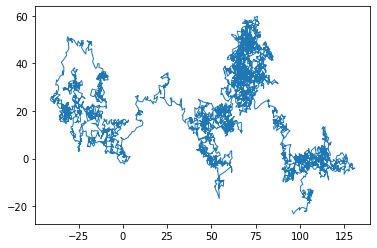

In [30]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1);

#### Use relplot() to combine lineplot() and FacetGrid. This allows grouping within additional categorical variables. Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets:

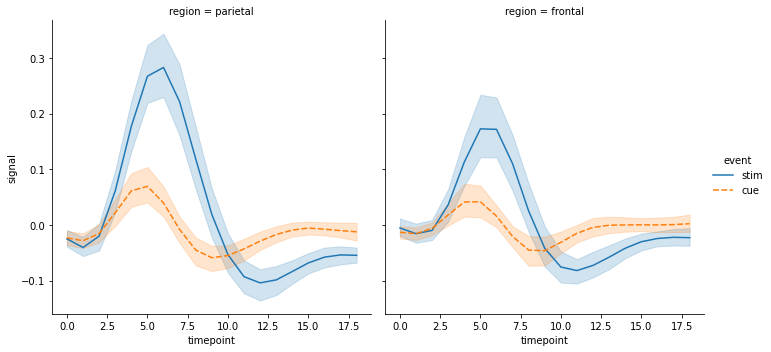

In [32]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    col="region", hue="event", style="event",
    kind="line"
);